In [1]:
filename = './API/kakaoAPI.txt'
with open(filename) as f:
    api_key = f.read()

In [2]:
import requests
from urllib.parse import quote
import json

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
# from shapely.geometry import Polygon
%matplotlib inline
import matplotlib.font_manager
import re

# # 폰트 설정
# mpl.rc('font', family='NanumGothic')
# # 유니코드에서  음수 부호설정
# mpl.rc('axes', unicode_minus=False)

In [4]:
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

In [5]:
df = pd.read_csv('./시각화 데이터/og_data/12_21_child(보행어린이).csv', encoding='cp949')

In [6]:
df.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,138468,2013097,1117013100,11170001,서울특별시 용산구1,서울특별시 용산구 한남동(순천향병원 부근),3,3,0,0,2,1,127.005586,37.533295,"{""type"":""Polygon"",""coordinates"":[[[127.0071863..."
1,144026,2013097,1120010700,11200001,서울특별시 성동구1,서울특별시 성동구 행당동(무학여고앞 부근),4,5,0,0,5,0,127.032724,37.558635,"{""type"":""Polygon"",""coordinates"":[[[127.034325,..."
2,144027,2013097,1121510300,11215001,서울특별시 광진구1,서울특별시 광진구 구의동(슬기유치원앞 부근),3,3,0,2,1,0,127.093095,37.552232,"{""type"":""Polygon"",""coordinates"":[[[127.0946952..."
3,140161,2013097,1121510400,11215002,서울특별시 광진구2,서울특별시 광진구 광장동(광장사거리 부근),5,5,0,1,3,1,127.103648,37.544331,"{""type"":""Polygon"",""coordinates"":[[[127.1052479..."
4,138521,2013097,1126010300,11260001,서울특별시 중랑구1,서울특별시 중랑구 중화동(태능시장 부근),3,3,0,0,2,1,127.076933,37.598100,"{""type"":""Polygon"",""coordinates"":[[[127.0785348..."


In [7]:
# 시도시군구명, 지점명, 발생건수, 사상자수, 사망자수, 중상자수, 경상자수, 부상신고자수, 경도, 위도 컬럼만 선택
df1 = df[['시도시군구명', '지점명', '발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도']]

In [8]:
# 서울특별시 행들만 선택
df2 = df1[df1['시도시군구명'].str.contains('서울특별시')]
df2.tail()

,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
964,서울특별시 광진구1,서울특별시 광진구 자양동(자양현대아파트 부근),3,3,0,0,3,0,127.082803,37.528717
965,서울특별시 강서구1,서울특별시 강서구 마곡동(서울공진초교 부근),3,3,0,0,2,1,126.821864,37.558522
966,서울특별시 구로구1,서울특별시 구로구 구로동(애경어린이공원 부근),3,3,0,0,3,0,126.884922,37.500117
967,서울특별시 강남구1,서울특별시 강남구 대치동(청실종합상가 부근),4,4,0,1,2,1,127.059528,37.493101
968,서울특별시 강동구1,서울특별시 강동구 성내동(둔촌역청구아파트 부근),3,3,0,1,1,1,127.133933,37.529526


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 968
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도시군구명  162 non-null    object 
 1   지점명     162 non-null    object 
 2   발생건수    162 non-null    int64  
 3   사상자수    162 non-null    int64  
 4   사망자수    162 non-null    int64  
 5   중상자수    162 non-null    int64  
 6   경상자수    162 non-null    int64  
 7   부상신고자수  162 non-null    int64  
 8   경도      162 non-null    float64
 9   위도      162 non-null    float64
dtypes: float64(2), int64(6), object(2)
memory usage: 13.9+ KB


In [10]:
#시도, 시군구 컬럼 분할
df2[['시도', '시군구']] = df2['시도시군구명'].str.split(' ', n=1, expand=True)
df2.head()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_3024\3034371522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['시도', '시군구']] = df2['시도시군구명'].str.split(' ', n=1, expand=True)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_3024\3034371522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['시도', '시군구']] = df2['시도시군구명'].str.split(' ', n=1, expand=True)


,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,시도,시군구
0,서울특별시 용산구1,서울특별시 용산구 한남동(순천향병원 부근),3,3,0,0,2,1,127.005586,37.533295,서울특별시,용산구1
1,서울특별시 성동구1,서울특별시 성동구 행당동(무학여고앞 부근),4,5,0,0,5,0,127.032724,37.558635,서울특별시,성동구1
2,서울특별시 광진구1,서울특별시 광진구 구의동(슬기유치원앞 부근),3,3,0,2,1,0,127.093095,37.552232,서울특별시,광진구1
3,서울특별시 광진구2,서울특별시 광진구 광장동(광장사거리 부근),5,5,0,1,3,1,127.103648,37.544331,서울특별시,광진구2
4,서울특별시 중랑구1,서울특별시 중랑구 중화동(태능시장 부근),3,3,0,0,2,1,127.076933,37.598100,서울특별시,중랑구1


In [11]:
# 시도시군구명 제거
df2 = df2.drop('시도시군구명', axis=1)
df2

,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,시도,시군구
0,서울특별시 용산구 한남동(순천향병원 부근),3,3,0,0,2,1,127.005586,37.533295,서울특별시,용산구1
1,서울특별시 성동구 행당동(무학여고앞 부근),4,5,0,0,5,0,127.032724,37.558635,서울특별시,성동구1
2,서울특별시 광진구 구의동(슬기유치원앞 부근),3,3,0,2,1,0,127.093095,37.552232,서울특별시,광진구1
3,서울특별시 광진구 광장동(광장사거리 부근),5,5,0,1,3,1,127.103648,37.544331,서울특별시,광진구2
4,서울특별시 중랑구 중화동(태능시장 부근),3,3,0,0,2,1,127.076933,37.598100,서울특별시,중랑구1
...,...,...,...,...,...,...,...,...,...,...,...
964,서울특별시 광진구 자양동(자양현대아파트 부근),3,3,0,0,3,0,127.082803,37.528717,서울특별시,광진구1
965,서울특별시 강서구 마곡동(서울공진초교 부근),3,3,0,0,2,1,126.821864,37.558522,서울특별시,강서구1
966,서울특별시 구로구 구로동(애경어린이공원 부근),3,3,0,0,3,0,126.884922,37.500117,서울특별시,구로구1
967,서울특별시 강남구 대치동(청실종합상가 부근),4,4,0,1,2,1,127.059528,37.493101,서울특별시,강남구1


In [12]:
# 차트 재정렬
df2  = df2[['시도', '시군구', '지점명', '발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도']]
df2.head()

,시도,시군구,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
0,서울특별시,용산구1,서울특별시 용산구 한남동(순천향병원 부근),3,3,0,0,2,1,127.005586,37.533295
1,서울특별시,성동구1,서울특별시 성동구 행당동(무학여고앞 부근),4,5,0,0,5,0,127.032724,37.558635
2,서울특별시,광진구1,서울특별시 광진구 구의동(슬기유치원앞 부근),3,3,0,2,1,0,127.093095,37.552232
3,서울특별시,광진구2,서울특별시 광진구 광장동(광장사거리 부근),5,5,0,1,3,1,127.103648,37.544331
4,서울특별시,중랑구1,서울특별시 중랑구 중화동(태능시장 부근),3,3,0,0,2,1,127.076933,37.598100


In [13]:
# 시군구에 붙어있는 숫자제거
df2['시군구'] = df2['시군구'].apply(lambda x: re.sub(r'\d+', '', x))
df2.head(3)

,시도,시군구,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
0,서울특별시,용산구,서울특별시 용산구 한남동(순천향병원 부근),3,3,0,0,2,1,127.005586,37.533295
1,서울특별시,성동구,서울특별시 성동구 행당동(무학여고앞 부근),4,5,0,0,5,0,127.032724,37.558635
2,서울특별시,광진구,서울특별시 광진구 구의동(슬기유치원앞 부근),3,3,0,2,1,0,127.093095,37.552232


In [17]:
# 구별로 그룹화
df3 = df2.groupby('시군구')['발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수'].agg(sum)
df3.head(3)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_3024\2265659450.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df2.groupby('시군구')['발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수'].agg(sum)


,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수
시군구,,,,,,
강남구,26,30,0,7,22,1
강동구,35,38,0,9,21,8
강북구,23,27,0,4,21,2


In [18]:
# 발생건수만 사용 
df4 = df3.groupby('시군구')['발생건수'].sum()

<Axes: xlabel='시군구'>

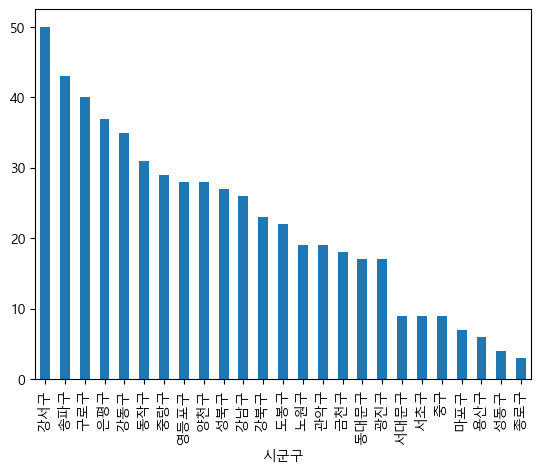

In [20]:
# 구별 어린이 보행자 사고 발생건수
df4.sort_values(ascending=False).plot.bar()

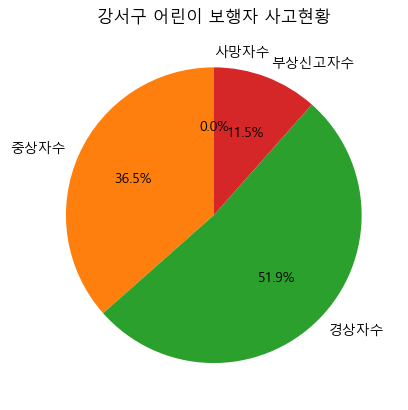

In [22]:
# 발생건수가 가장 많은 강서구 어린이 보행자 사고 다발지역
# 발생건수,사상자수, 사망자수, 중상자수, 경상자수, 부상신고자수

guro_pie = df3.loc['강서구',['사망자수', '중상자수', '경상자수', '부상신고자수']]

#파이차트

plt.pie(guro_pie, labels=guro_pie.index, autopct='%1.1f%%', startangle=90)
plt.title('강서구 어린이 보행자 사고현황')
plt.show()

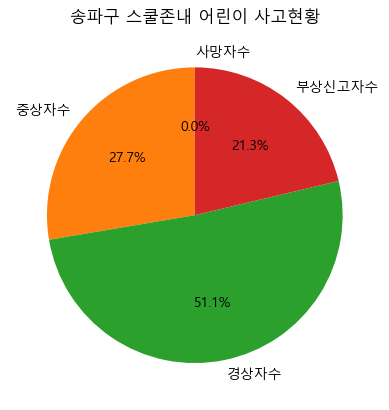

In [23]:
# CCTV 개수가 가장 적은 송파구 어린이 스쿨존 내 교통사고
# 발생건수,사상자수, 사망자수, 중상자수, 경상자수, 부상신고자수

guro_pie = df3.loc['송파구',['사망자수', '중상자수', '경상자수', '부상신고자수']]

#파이차트

plt.pie(guro_pie, labels=guro_pie.index, autopct='%1.1f%%', startangle=90)
plt.title('송파구 스쿨존내 어린이 사고현황')
plt.show()

In [24]:
# 강서구 어린이 보행자 사고다발지역 

# 강서구 중심 좌표
center = [37.550962, 126.849532]

# 지도 객체 생성
map = folium.Map(location=center, zoom_start=12)

# 깅서구에 해당하는 데이터만 필터링
songpa = df2[df2['시군구'] == '강서구']

# 데이터를 이용하여 지도에 마커 생성
for index, row in songpa.iterrows():
    lat = row['위도']
    lng = row['경도']
    location = [lat, lng]
    tooltip = f"{row['지점명']}\n발생건수: {row['발생건수']}\n사상자수: {row['사상자수']}"
    folium.Marker(location=location, tooltip=tooltip).add_to(map)

# 지도 출력
map

In [25]:
# 송파구 어린이 보행자 사고다발지역
# 송파구 중심 좌표
center = [37.504493, 127.114464]

# 지도 객체 생성
map = folium.Map(location=center, zoom_start=12)

# 송파구에 해당하는 데이터만 필터링
songpa = df2[df2['시군구'] == '송파구']

# 데이터를 이용하여 지도에 마커 생성
for index, row in songpa.iterrows():
    lat = row['위도']
    lng = row['경도']
    location = [lat, lng]
    tooltip = f"{row['지점명']}\n발생건수: {row['발생건수']}\n사상자수: {row['사상자수']}"
    folium.Marker(location=location, tooltip=tooltip).add_to(map)

# 지도 출력
map

In [26]:
df2.to_csv('어린이 보행자 사고다발지역.csv', index=False)